# NANCY DATA ALCHEMY ASSIGNMENT_WEEK3 & WEEK4



In [180]:
# Data handling
import pandas as pd  # DataFrames
import numpy as np  # Arrays

# Visualization
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical graphics

# Utilities
import itertools  # Iterators
import math  # Math functions
from math import ceil  # Ceil function

# Dataset & outliers
from sklearn import datasets  # Datasets
from sklearn.ensemble import IsolationForest  # Anomaly detection

# UCI dataset fetching
from ucimlrepo import fetch_ucirepo  # Fetch datasets

# Statistical analysis
from scipy import stats  # Statistics
from scipy.stats import pointbiserialr  # Correlation
from scipy.stats import chi2_contingency  # Chi-squared test

# Clustering
from scipy.cluster.hierarchy import linkage  # Clustering
from scipy.spatial.distance import pdist  # Pairwise distance
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Preprocessing & modeling
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.linear_model import LinearRegression  # Linear regression
from sklearn.preprocessing import OneHotEncoder  # Encoding
from sklearn.compose import ColumnTransformer  # Column transformer
from sklearn.pipeline import Pipeline  # Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree  # Decision tree (regression)
from sklearn.metrics import mean_squared_error, r2_score  # Metrics (regression)
from sklearn.linear_model import LogisticRegression  # Logistic regression
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error  # Metrics (classification, regression)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Classification metrics
from sklearn.ensemble import RandomForestRegressor  # Random forest (regression)
from sklearn.tree import DecisionTreeClassifier  # Decision tree (classification)
from sklearn.ensemble import RandomForestClassifier  # Random forest (classification)
from sklearn.model_selection import train_test_split, GridSearchCV  # Grid search

# Visualization settings
sns.set(style="whitegrid")  # Plot style


### 1. Data Loading & Quick Overview

In [181]:
# Downloading the covid data set
covid_data = pd.read_csv("covid_data.csv")
covid_data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [182]:
# Displaying the first few rows
covid_data.head() # displays the first 5 rows of the data set

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [183]:
# Renaming columns to snake case and lower case
covid_data.columns = covid_data.columns.str.replace(" ","_")
covid_data.columns = covid_data.columns.str.lower()
covid_data.columns

Index(['usmer', 'medical_unit', 'sex', 'patient_type', 'date_died', 'intubed',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hipertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'clasiffication_final', 'icu'],
      dtype='object')

In [184]:
# Function to replace the date_died values with 1 for alive and 2 for dead
def replacement(x):
    if x == "9999-99-99":
        x = 1

        return x
    else:
        x = 2

        return x


data = [1,2,3,4]
replacement(3)

covid_data['date_died']= covid_data["date_died"].apply(replacement)


In [185]:
# Changing hipertension and date_died variable names to hypertension and status
covid_data = covid_data.rename(columns={'hipertension': 'hypertension'})
covid_data = covid_data.rename(columns={'date_died': 'status'})

In [186]:
# Subsetting to only have the hospitalized patients in the data set
covid_data = covid_data[covid_data['patient_type'] == 2]

# Removing the patient_type column since it only has the hospitalized records
covid_data = covid_data.drop(columns=['patient_type'])

In [187]:
# Subsetting the data set to include fewer variables of interest
covid_data = covid_data[['copd', 'age', 'status', 'diabetes', 'hypertension', 'clasiffication_final', 'pneumonia', 'asthma', 'cardiovascular']]


In [188]:
# Function to map classification
def classify(row):
    if row == 1:
        return "Mild"
    elif row == 2:
        return "Moderate"
    elif row == 3:
        return "Severe"
    else:
        return "Not a Carrier/Inconclusive"


# Function to map status
def map_status(value):
    if value == 1:
        return "Alive"
    elif value == 2:
        return "Dead"
    else:
        return "Unknown"  # For other values


# Application of the classify function to the 'clasiffication_final' column
covid_data['clasiffication_final'] = covid_data['clasiffication_final'].apply(classify)

# Application of the map_status function to the 'status' column
covid_data['status'] = covid_data['status'].apply(map_status)


In [189]:
# Function to map Yes/No
def map_yes_no(value):
    if value == 1:
        return "Yes"
    elif value == 2:
        return "No"
    else:
        return "Unknown"  # Applying for the other values

# List of my columns that need the change
columns_to_map = ['pneumonia', 'diabetes', 'copd', 'asthma', 
                  'hypertension','cardiovascular']

# Application of the function to change the entries in the variables from1,2 to Yes/No
for column in columns_to_map:
    if column in covid_data.columns:
        covid_data[column] = covid_data[column].apply(map_yes_no)


In [190]:
covid_data.head(20)

,copd,age,status,diabetes,hypertension,clasiffication_final,pneumonia,asthma,cardiovascular
2,No,55,Dead,Yes,No,Severe,No,No,No
5,No,40,Alive,No,No,Severe,Yes,No,No
8,No,37,Alive,Yes,Yes,Severe,No,No,No
9,No,25,Alive,No,No,Severe,No,No,No
11,No,24,Alive,No,No,Severe,No,No,No
12,No,30,Alive,No,No,Severe,No,No,No
16,No,80,Alive,No,Yes,Severe,Yes,No,No
20,No,59,Alive,Yes,No,Severe,Yes,No,No
30,No,45,Alive,No,No,Severe,Yes,No,No
41,No,45,Alive,No,No,Severe,Yes,No,No


### 2. Shape & Features

In [191]:
# The shape of the test data set
print(f"Dataset shape: {covid_data.shape}")

Dataset shape: (200031, 9)


In [192]:
# Displaying all column names
print("\nColumn Names:") 
print(covid_data.columns.tolist())


Column Names:
['copd', 'age', 'status', 'diabetes', 'hypertension', 'clasiffication_final', 'pneumonia', 'asthma', 'cardiovascular']


# Questions to ponder: 

1. Does the data match your expectations or do you think you might need more information?
After data cleaning and exploration above the data set now is set and ready for the project
2. Do the columns/features align with your problem statement?
Yes sure the columns are align with my problem statement
3. Any immediate signs of missing or corrupted data? 
There were 0.95% signs of missing data assigned 97, 98 and 99 which i decided to remove due to their little signfificance in the models.


#### Questions to ponder: 

1. Is the data large enough for the analysis?
Yes I suppose the data set is great for analysis after cleanining above, subsetting to only hospitalized patients
2. Are there any duplicate columns, or columns with similar information or ones that need re-naming? (I renamed the columns to snake case and lower case.

### 3. Data Types & Missing Values

In [193]:
# understanding the datatypes
covid_data.dtypes

copd                    object
age                      int64
status                  object
diabetes                object
hypertension            object
clasiffication_final    object
pneumonia               object
asthma                  object
cardiovascular          object
dtype: object

In [194]:
# Checking for missing values
print("\nMissing Values Count:")
print(covid_data.isnull().sum())


Missing Values Count:
copd                    0
age                     0
status                  0
diabetes                0
hypertension            0
clasiffication_final    0
pneumonia               0
asthma                  0
cardiovascular          0
dtype: int64


#### Questions to ponder: 

- Should we drop or impute missing values?
We do not have any missing values in the data set so there is no need to impute or drop
- Could missing data be an insight in and of itself?
Yes missing data can be insightful as it can have special aspect about the data set or the column, It shows data issues and can be a guide towards data cleaning needs. As well missing data can show patterns of events.


In [195]:
# Checking out the uniques values in each column
unique_values = covid_data.apply(lambda x: x.unique())
# Display the unique values for each column
print(unique_values)


copd                                                   [No, Yes, Unknown]
age                     [55, 40, 37, 25, 24, 30, 80, 59, 45, 16, 56, 5...
status                                                      [Dead, Alive]
diabetes                                               [Yes, No, Unknown]
hypertension                                           [No, Yes, Unknown]
clasiffication_final    [Severe, Not a Carrier/Inconclusive, Mild, Mod...
pneumonia                                              [No, Yes, Unknown]
asthma                                                 [No, Yes, Unknown]
cardiovascular                                         [No, Yes, Unknown]
dtype: object


In [196]:
columns_to_check = ['copd', 'diabetes', 'hypertension', 'pneumonia', 'asthma', 'cardiovascular', 'status']
total_entries = covid_data.shape[0]

# Calculate counts and ratios for 'Unknown' values in the specified columns
for column in columns_to_check:
    count_unknown = (covid_data[column] == 'Unknown').sum()
    ratio_unknown = count_unknown / total_entries
    print(f"Count of Unknown in {column}: {count_unknown}")
    print(f"Ratio of Unknown in {column}: {ratio_unknown:.4f}")


Count of Unknown in copd: 1064
Ratio of Unknown in copd: 0.0053
Count of Unknown in diabetes: 1195
Ratio of Unknown in diabetes: 0.0060
Count of Unknown in hypertension: 1106
Ratio of Unknown in hypertension: 0.0055
Count of Unknown in pneumonia: 5144
Ratio of Unknown in pneumonia: 0.0257
Count of Unknown in asthma: 1066
Ratio of Unknown in asthma: 0.0053
Count of Unknown in cardiovascular: 1143
Ratio of Unknown in cardiovascular: 0.0057
Count of Unknown in status: 0
Ratio of Unknown in status: 0.0000


In [197]:
# Removing the unknown values
covid_data = covid_data[~covid_data[columns_to_check].isin(['Unknown']).any(axis=1)]


In [198]:
# Checking out the uniques values in each column
unique_values = covid_data.apply(lambda x: x.unique())
# Display the unique values for each column
print(unique_values)

copd                                                            [No, Yes]
age                     [55, 40, 37, 25, 24, 30, 80, 59, 45, 16, 56, 5...
status                                                      [Dead, Alive]
diabetes                                                        [Yes, No]
hypertension                                                    [No, Yes]
clasiffication_final    [Severe, Not a Carrier/Inconclusive, Mild, Mod...
pneumonia                                                       [No, Yes]
asthma                                                          [No, Yes]
cardiovascular                                                  [No, Yes]
dtype: object


In [199]:
# Checking the number of 97, 98, 99 values from the age column and their ratio
count_97 = (covid_data['age'] == 97).sum()
count_98 = (covid_data['age'] == 98).sum()
count_99 = (covid_data['age'] == 99).sum()
total_entries = covid_data['age'].shape[0]
ratio_97 = count_97 / total_entries
ratio_98 = count_98 / total_entries
ratio_99 = count_99 / total_entries

print(f"Count of 97 in age: {count_97}")
print(f"Count of 98 in age: {count_98}")
print(f"Count of 99 in age: {count_99}")
print(f"Ratio of 97 in age: {ratio_97:.4f}")
print(f"Ratio of 98 in age: {ratio_98:.4f}")
print(f"Ratio of 99 in age: {ratio_99:.4f}")

Count of 97 in age: 72
Count of 98 in age: 58
Count of 99 in age: 42
Ratio of 97 in age: 0.0004
Ratio of 98 in age: 0.0003
Ratio of 99 in age: 0.0002


In [200]:
# Removing the 97,98,99 that signify the missing values and unkwonn values.
covid_data = covid_data[~covid_data['age'].isin([97, 98, 99])]


In [201]:
# Checking the number of 97, 98, 99 values from the age column and their ratio after removing
count_97 = (covid_data['age'] == 97).sum()
count_98 = (covid_data['age'] == 98).sum()
count_99 = (covid_data['age'] == 99).sum()
total_entries = covid_data['age'].shape[0]
ratio_97 = count_97 / total_entries
ratio_98 = count_98 / total_entries
ratio_99 = count_99 / total_entries

print(f"Count of 97 in age: {count_97}")
print(f"Count of 98 in age: {count_98}")
print(f"Count of 99 in age: {count_99}")
print(f"Ratio of 97 in age: {ratio_97:.4f}")
print(f"Ratio of 98 in age: {ratio_98:.4f}")
print(f"Ratio of 99 in age: {ratio_99:.4f}")

Count of 97 in age: 0
Count of 98 in age: 0
Count of 99 in age: 0
Ratio of 97 in age: 0.0000
Ratio of 98 in age: 0.0000
Ratio of 99 in age: 0.0000


In [202]:
# The shape of the test data set
print(f"Dataset shape: {covid_data.shape}")

Dataset shape: (193109, 9)


### 4. Summary Statistics & Outlier Detection

In [203]:
#Summary statistics
covid_data.describe()

,age
count,193109.000000
mean,53.060986
std,19.412152
min,0.000000
25%,42.000000
50%,55.000000
75%,67.000000
max,118.000000


#### Question to ponder
- Did you expect outliers? 
I expected outliers in the age variable
- Which features have unusually high or low values? What do they tell us about the data?
The age data has values with 0 and entries upto 120 years for 120 years it makes sense since a patient might get to 120 yrs
- Are there any suspicious patterns or extreme outliers?
There are outliers in the data set
- Do we need to drop or transform these outliers?


### 5. Univariate Analysis

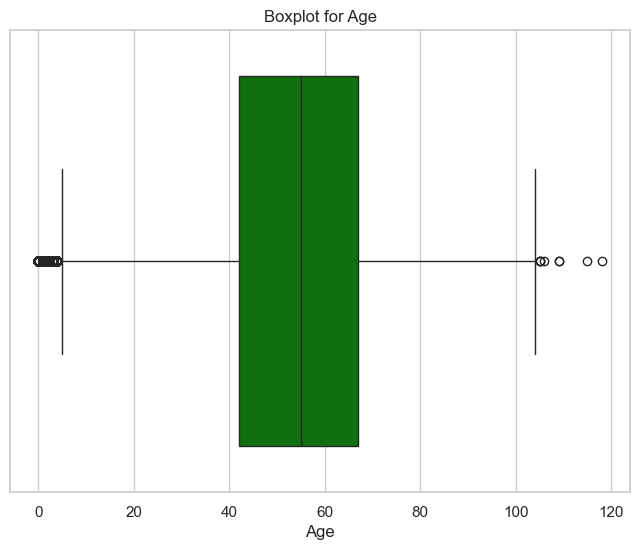

In [204]:
# Checking for outliers in age variable using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=covid_data['age'], color='green')
plt.title('Boxplot for Age')
plt.xlabel('Age')
plt.show()


In [205]:
# Calculating outliers and removing them from the age variable
Q1 = covid_data['age'].quantile(0.25)
Q3 = covid_data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = covid_data[(covid_data['age'] < lower_bound) | (covid_data['age'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")
# Removing outliers from the age variable
covid_data = covid_data[(covid_data['age'] >= lower_bound) & (covid_data['age'] <= upper_bound)]


Number of outliers: 6053


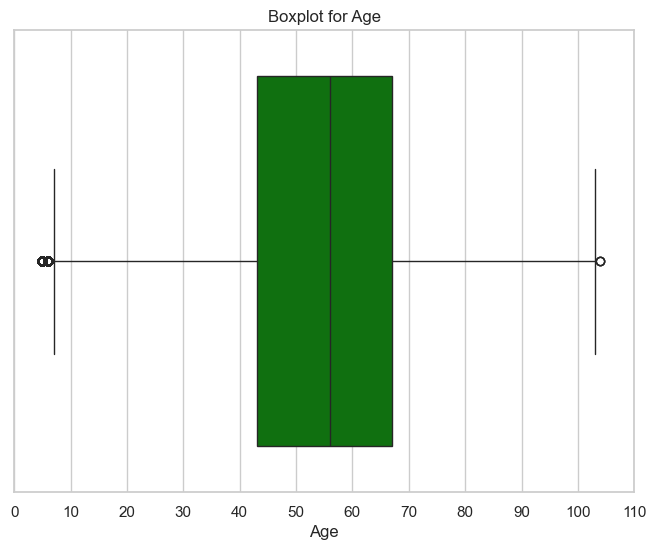

In [206]:
# Plotting a box plot of the age variable after removing the data outliers.
plt.figure(figsize=(8, 6))
sns.boxplot(x=covid_data['age'], color='green')
plt.title('Boxplot for Age')
plt.xlabel('Age')
plt.xlim(left=0)
plt.xticks(range(0, int(covid_data['age'].max()) + 10, 10))
plt.show()

/var/folders/gk/xzj_2t0j1s9f_b0_yrchmhfh0000gn/T/ipykernel_74101/1362672916.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=covid_data, x=column, ax=axes[i], palette=custom_palette)
/var/folders/gk/xzj_2t0j1s9f_b0_yrchmhfh0000gn/T/ipykernel_74101/1362672916.py:12: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=covid_data, x=column, ax=axes[i], palette=custom_palette)
/var/folders/gk/xzj_2t0j1s9f_b0_yrchmhfh0000gn/T/ipykernel_74101/1362672916.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=covid_data, x=column, ax=axes[i], palette=custom_palette)
/var/folders/gk/xzj_2t0j1s9f_b0_yrchmhfh0000gn/T/ipyke

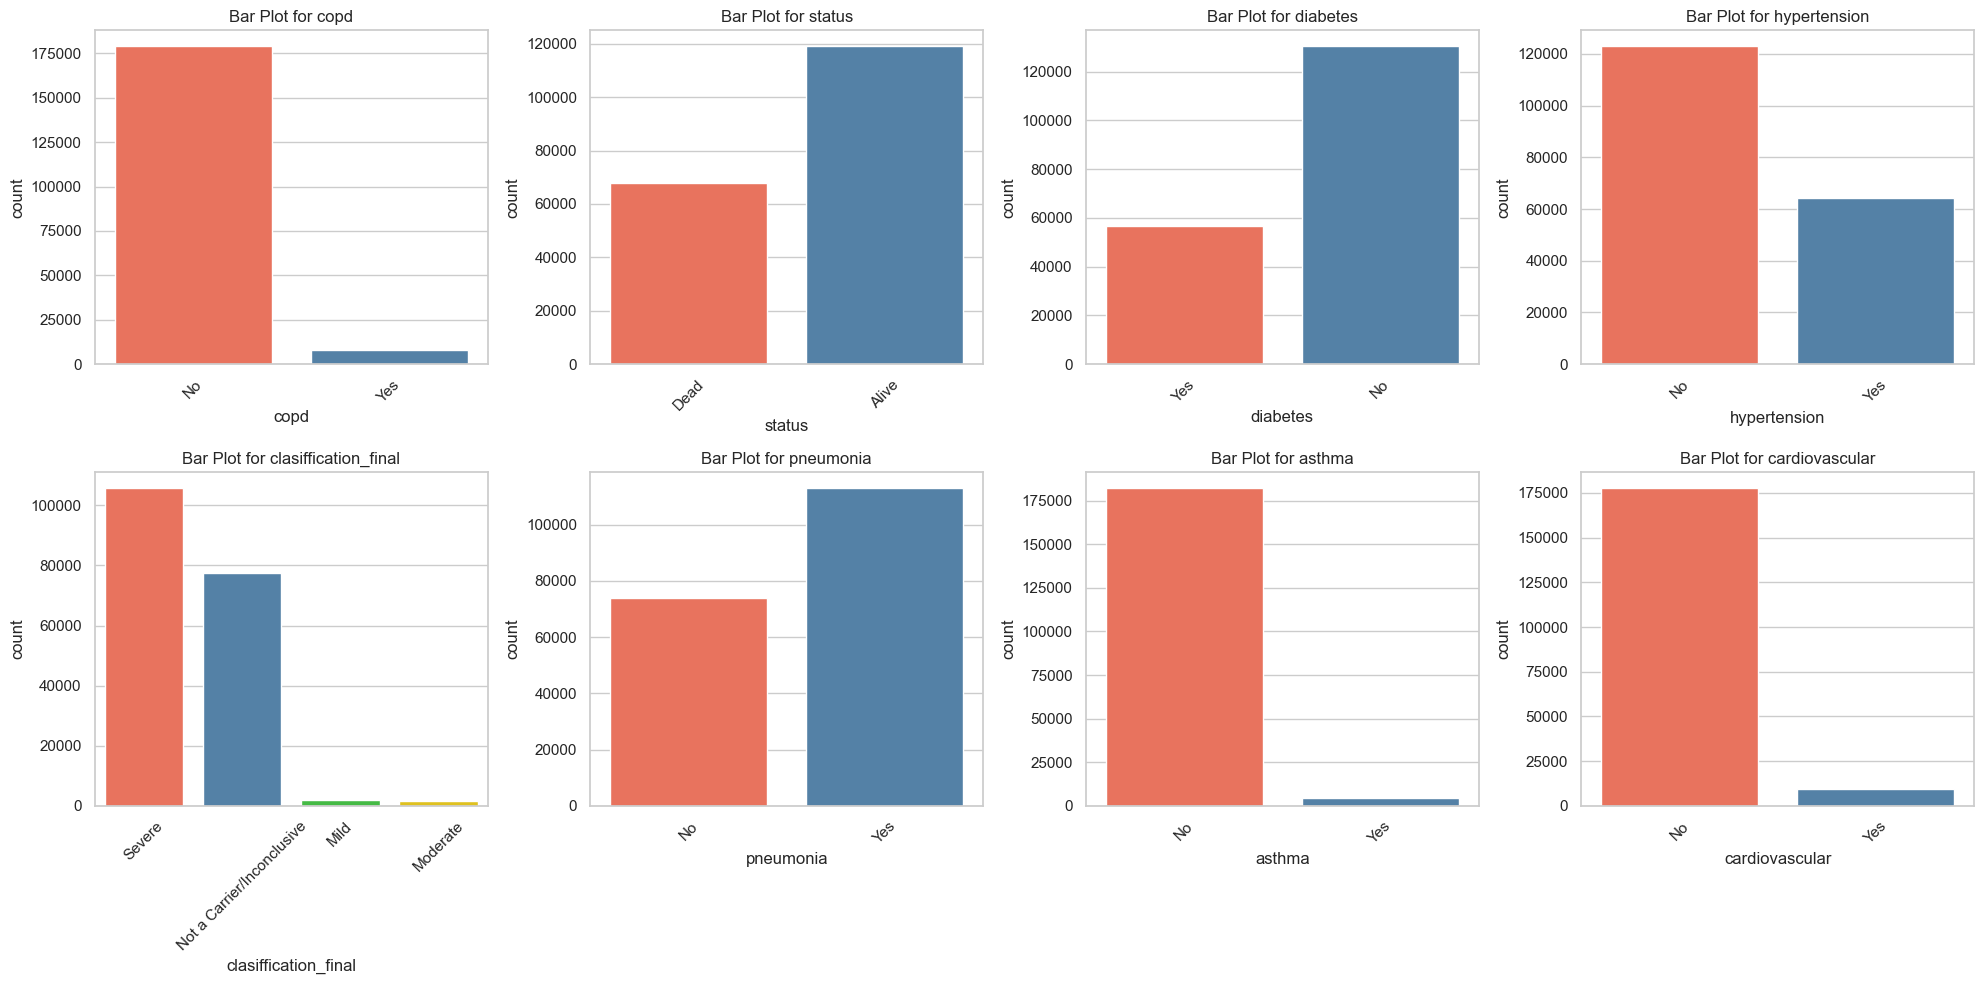

In [207]:
# Creating count plots for the categorical variables
categorical_columns = covid_data.select_dtypes(include=['object', 'category']).columns
n_cols = 4
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2', '#FF69B4', '#A52A2A', '#20B2AA']

for i, column in enumerate(categorical_columns):
    sns.countplot(data=covid_data, x=column, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f'Bar Plot for {column}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Questions to ponder:
- Are the numerical features skewed or roughly normal?

There is only 1 numeric variable which is seemingly well distributed with a median of about 55-60

- Which categories dominate in each categorical feature? What does that tell you about each feature? 
sex - male are more than females

status - More patients turned out alive

pneumonia - more people reported to have pneumonia

diabetis - less people with diabets

copd - More people with No

asthma - less people reported to suffer from asthma

hypertension - more people reported to not be having cases of hypertension

cadiovascular - very less people reported to have cadiovascular disease.

for  clasiffication_final for those who were hospitalized most were reported to have had severe covid-19 results with some being either inconclusive or not carriers meaning some might have been hospitalized for something else

### 6. Bivariate Analysis

/var/folders/gk/xzj_2t0j1s9f_b0_yrchmhfh0000gn/T/ipykernel_74101/3293674678.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=covid_data[column], y=covid_data['age'], palette='viridis')
/var/folders/gk/xzj_2t0j1s9f_b0_yrchmhfh0000gn/T/ipykernel_74101/3293674678.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=covid_data[column], y=covid_data['age'], palette='viridis')
/var/folders/gk/xzj_2t0j1s9f_b0_yrchmhfh0000gn/T/ipykernel_74101/3293674678.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=covid_data[column], y=covid_data['age

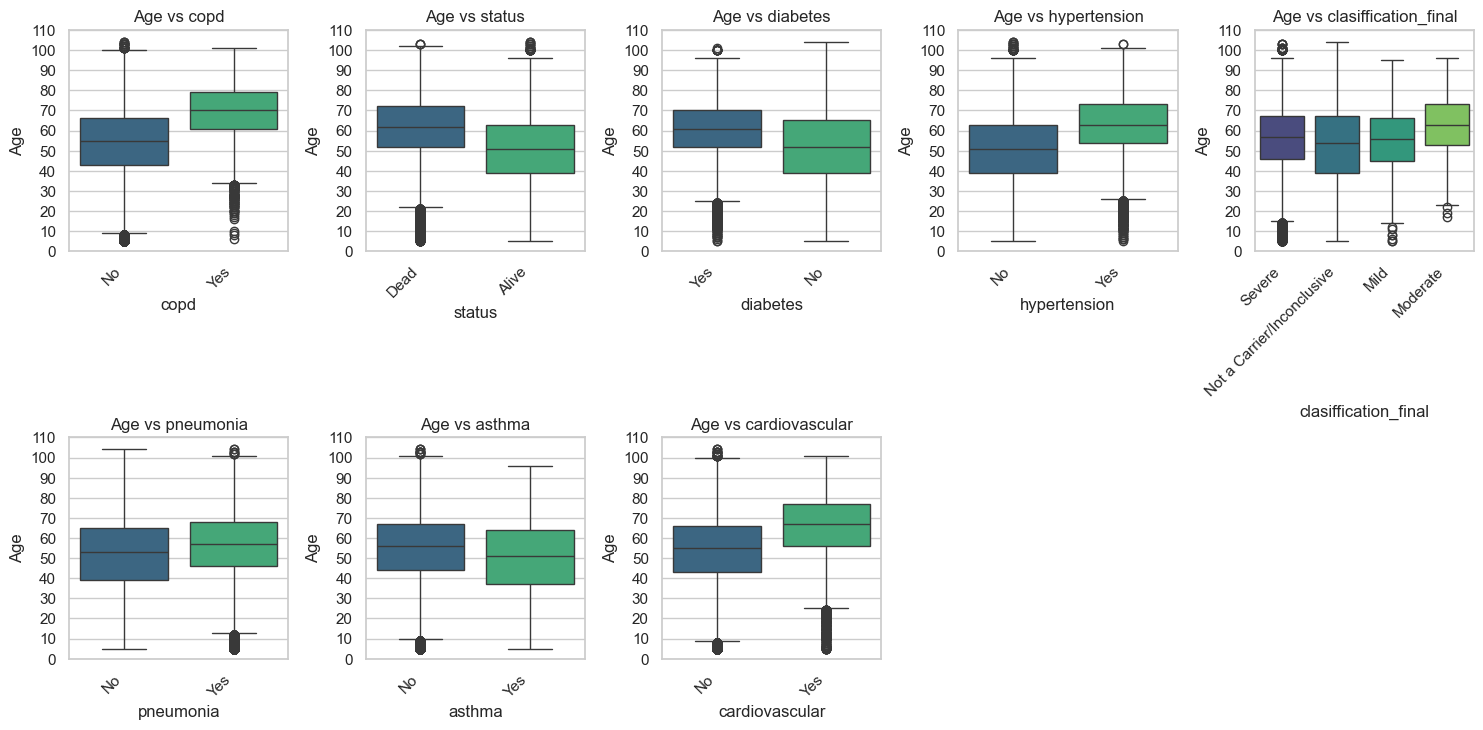

In [208]:

# Creating box plots for categorical variables against age
categorical_columns = covid_data.select_dtypes(include=['object', 'category']).columns.tolist()
plt.figure(figsize=(15, 15))

# Looping through the categorical columns for the boxplot
for i, column in enumerate(categorical_columns):
    plt.subplot(4, 5, i + 1)  # 4 rows and 5 columns for subplot grid
    sns.boxplot(x=covid_data[column], y=covid_data['age'], palette='viridis')
    
    # Setting the title and labels of the plot
    plt.title(f'Age vs {column}')
    plt.xlabel(column)
    plt.ylabel('Age')

    plt.xticks(rotation=45, ha='right')  # Rotate x-ticks by 45 degrees, align to the right
    plt.yticks(range(0, int(covid_data['age'].max()) + 10, 10))  # Set ticks at intervals of 10

plt.tight_layout()
plt.show()



/var/folders/gk/xzj_2t0j1s9f_b0_yrchmhfh0000gn/T/ipykernel_74101/1917970334.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=covid_data[column], y=covid_data['age'], palette='viridis')
/var/folders/gk/xzj_2t0j1s9f_b0_yrchmhfh0000gn/T/ipykernel_74101/1917970334.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=covid_data[column], y=covid_data['age'], palette='viridis')
/var/folders/gk/xzj_2t0j1s9f_b0_yrchmhfh0000gn/T/ipykernel_74101/1917970334.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=covid_data[column], y=covid_

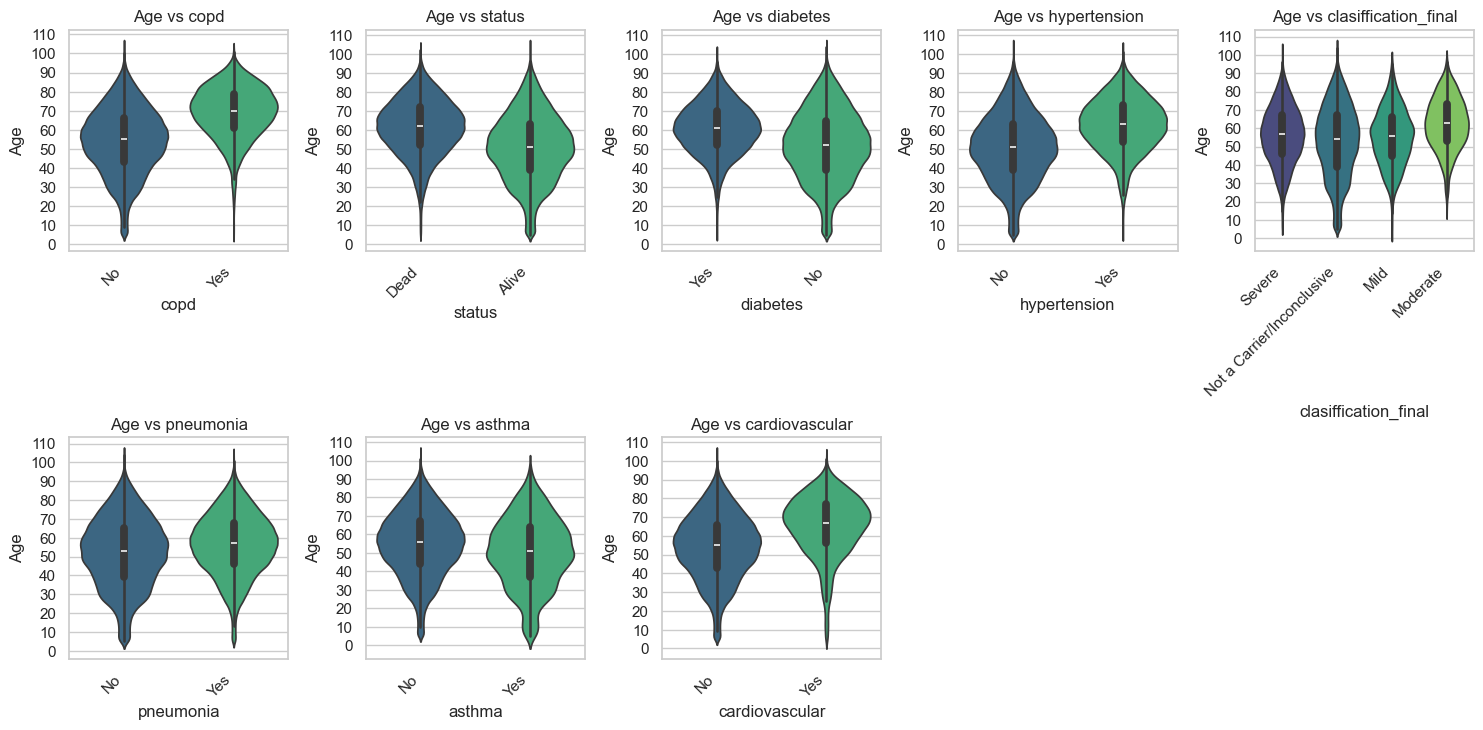

In [209]:

# Creating violin plots for visualization
categorical_columns = covid_data.select_dtypes(include=['object', 'category']).columns.tolist()
plt.figure(figsize=(15, 15))

# Looping through the categorical columns for the violins creation
for i, column in enumerate(categorical_columns):
    plt.subplot(4, 5, i + 1) 
    sns.violinplot(x=covid_data[column], y=covid_data['age'], palette='viridis')
    
    # Setting the plot title and labels
    plt.title(f'Age vs {column}')
    plt.xlabel(column)
    plt.ylabel('Age')

    plt.xticks(rotation=45, ha='right')  # Rotate x-ticks by 45 degrees, and align to the right
    plt.yticks(range(0, int(covid_data['age'].max()) + 10, 10))  # Code sets the ticks at intervals of 10

plt.tight_layout()
plt.show()


#### Questions to ponder

- Which numerical features are correlated?
There is only 1 numeric variable which is age which relates with the other variables.
- Do certain categories strongly associate with higher or lower numerical values?
Yes there are some discrete variables that show varying trends with higher age or lower, most of the binary values showing very minimal differences with the age median in their distribution however the difference is still noticeable.
There is also some distinct connections between the variable features across other variables.
More patients were reported to have pneumonia and in the regression there is a higher relation of pneumonia and status
- Any visible clusters or patterns in scatter plots?
I only used the box plots and the violins since scatter plot mostly is useful for numeric variables and I am working with discrete variables of mostly binary nature.

### 7. Multivariate Analysis

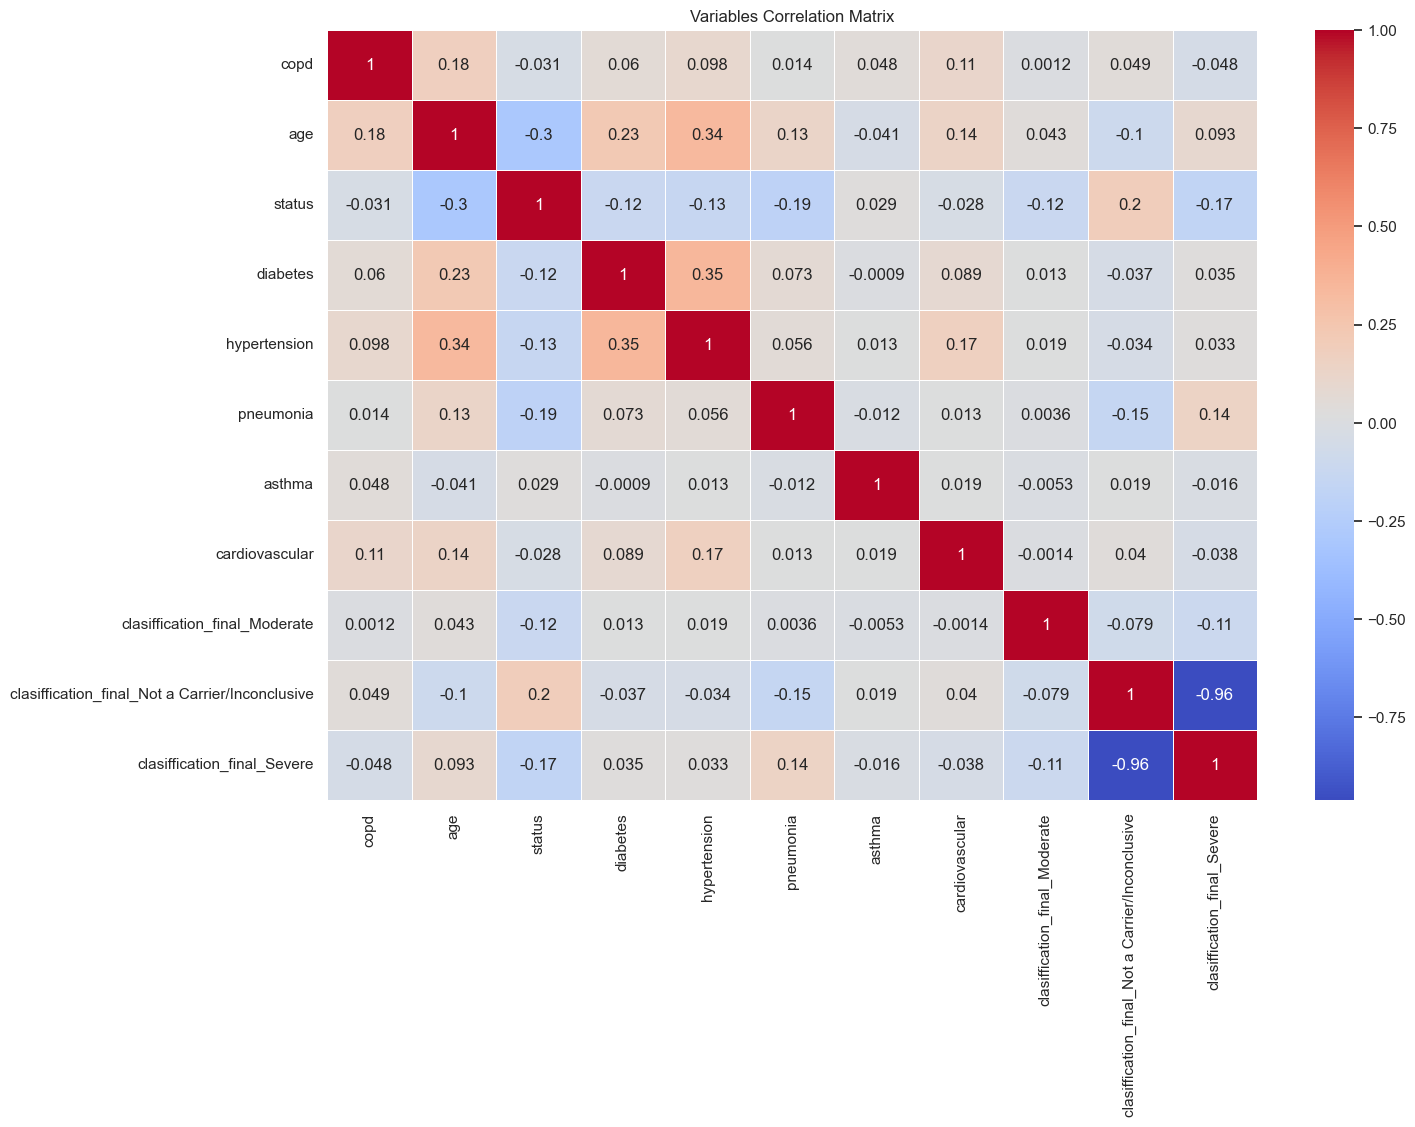

In [210]:
# Correlation matrix to visualize the relationship between the categorical values with a focus on the status against the cormobidities and age
covid_data1 = covid_data.copy()

covid_data1['status'] = covid_data1['status'].map({'Alive': 1, 'Dead': 0})
covid_data1['copd'] = covid_data1['copd'].map({'Yes': 1, 'No': 0})
covid_data1['diabetes'] = covid_data1['diabetes'].map({'Yes': 1, 'No': 0})
covid_data1['hypertension'] = covid_data1['hypertension'].map({'Yes': 1, 'No': 0})
covid_data1['pneumonia'] = covid_data1['pneumonia'].map({'Yes': 1, 'No': 0})
covid_data1['asthma'] = covid_data1['asthma'].map({'Yes': 1, 'No': 0})
covid_data1['cardiovascular'] = covid_data1['cardiovascular'].map({'Yes': 1, 'No': 0})

covid_data1 = pd.get_dummies(covid_data1, columns=['clasiffication_final'], drop_first=True)

correlation_matrix = covid_data1.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Variables Correlation Matrix')
plt.show()


#### Questions to ponder

- Which features show strong correlation?
The variables are not highly positively or negatively correlated.
Clasiffication_final Not a Carrier/Inconclusive is negatively highly correlated with clasiffication_final Severe
- Should we remove or combine highly correlated features?
No
- Are there surprising correlations that warrant deeper investigation?

### 8. Next Steps

- Which features appear most important for the problem?
Classification_final, status
- What data cleaning or transformation steps remain?
No more steps at this point, however after checking the models performance I am think I should check the variables and scrap off some
- How will these insights guide the next phase (modeling, reporting, or business decisions)?
The insights guide the dependent variable and the independent variables for the models



# Modelling and Evaluation

### Regression Models

In [211]:
# Linear regression for the dependant variable age and the independent variables.
# Creating data set copy to avoid tampering with the original data set
covid_data_copy = covid_data.copy()

# Data preprocessing
covid_data_copy['status'] = covid_data_copy['status'].map({'Alive': 1, 'Dead': 0})  # Alive=1, Dead=0
covid_data_copy['copd'] = covid_data_copy['copd'].map({'Yes': 1, 'No': 0})
covid_data_copy['diabetes'] = covid_data_copy['diabetes'].map({'Yes': 1, 'No': 0})
covid_data_copy['hypertension'] = covid_data_copy['hypertension'].map({'Yes': 1, 'No': 0})
covid_data_copy['pneumonia'] = covid_data_copy['pneumonia'].map({'Yes': 1, 'No': 0})
covid_data_copy['asthma'] = covid_data_copy['asthma'].map({'Yes': 1, 'No': 0})
covid_data_copy['cardiovascular'] = covid_data_copy['cardiovascular'].map({'Yes': 1, 'No': 0})

# One-Hot Encoding for the 'clasiffication_final' column 
covid_data_copy = pd.get_dummies(covid_data_copy, columns=['clasiffication_final'], drop_first=True)

X = covid_data_copy.drop(columns=['age'])  # Independent variables (excluding 'age' from features)
y = covid_data_copy['age']  # Dependent variable (age)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # Fitting model on the training data

# Predictions
y_pred_lin = lin_reg.predict(X_test)

# Calculating performance metrics
r2_lin = r2_score(y_test, y_pred_lin)  # R-squared score
mse_lin = mean_squared_error(y_test, y_pred_lin)  # Mean Squared Error
mae_lin = mean_absolute_error(y_test, y_pred_lin)  # Mean Absolute Error
rmse_lin = np.sqrt(mse_lin)  # Root Mean Squared Error

print("Intercept:", lin_reg.intercept_)
print("Model Coefficients:")
coefficients = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

print("R-squared score on the test data:", r2_lin)

print("MSE (Mean Squared Error):", mse_lin)
print("RMSE (Root Mean Squared Error):", rmse_lin)
print("MAE (Mean Absolute Error):", mae_lin)

Intercept: 54.401496812631024
Model Coefficients:
                                                 Coefficient
copd                                               11.795582
status                                             -8.059343
diabetes                                            3.779581
hypertension                                        8.766609
pneumonia                                           1.812907
asthma                                             -4.870012
cardiovascular                                      5.452634
clasiffication_final_Moderate                       1.119004
clasiffication_final_Not a Carrier/Inconclusive    -1.411283
clasiffication_final_Severe                         0.222759
R-squared score on the test data: 0.22098251253593137
MSE (Mean Squared Error): 234.73430365940243
RMSE (Root Mean Squared Error): 15.321041206765369
MAE (Mean Absolute Error): 12.195621042712888


Decision Tree Regressor R²: 0.2514600904042621
Decision Tree Regressor MSE: 225.55077038412688


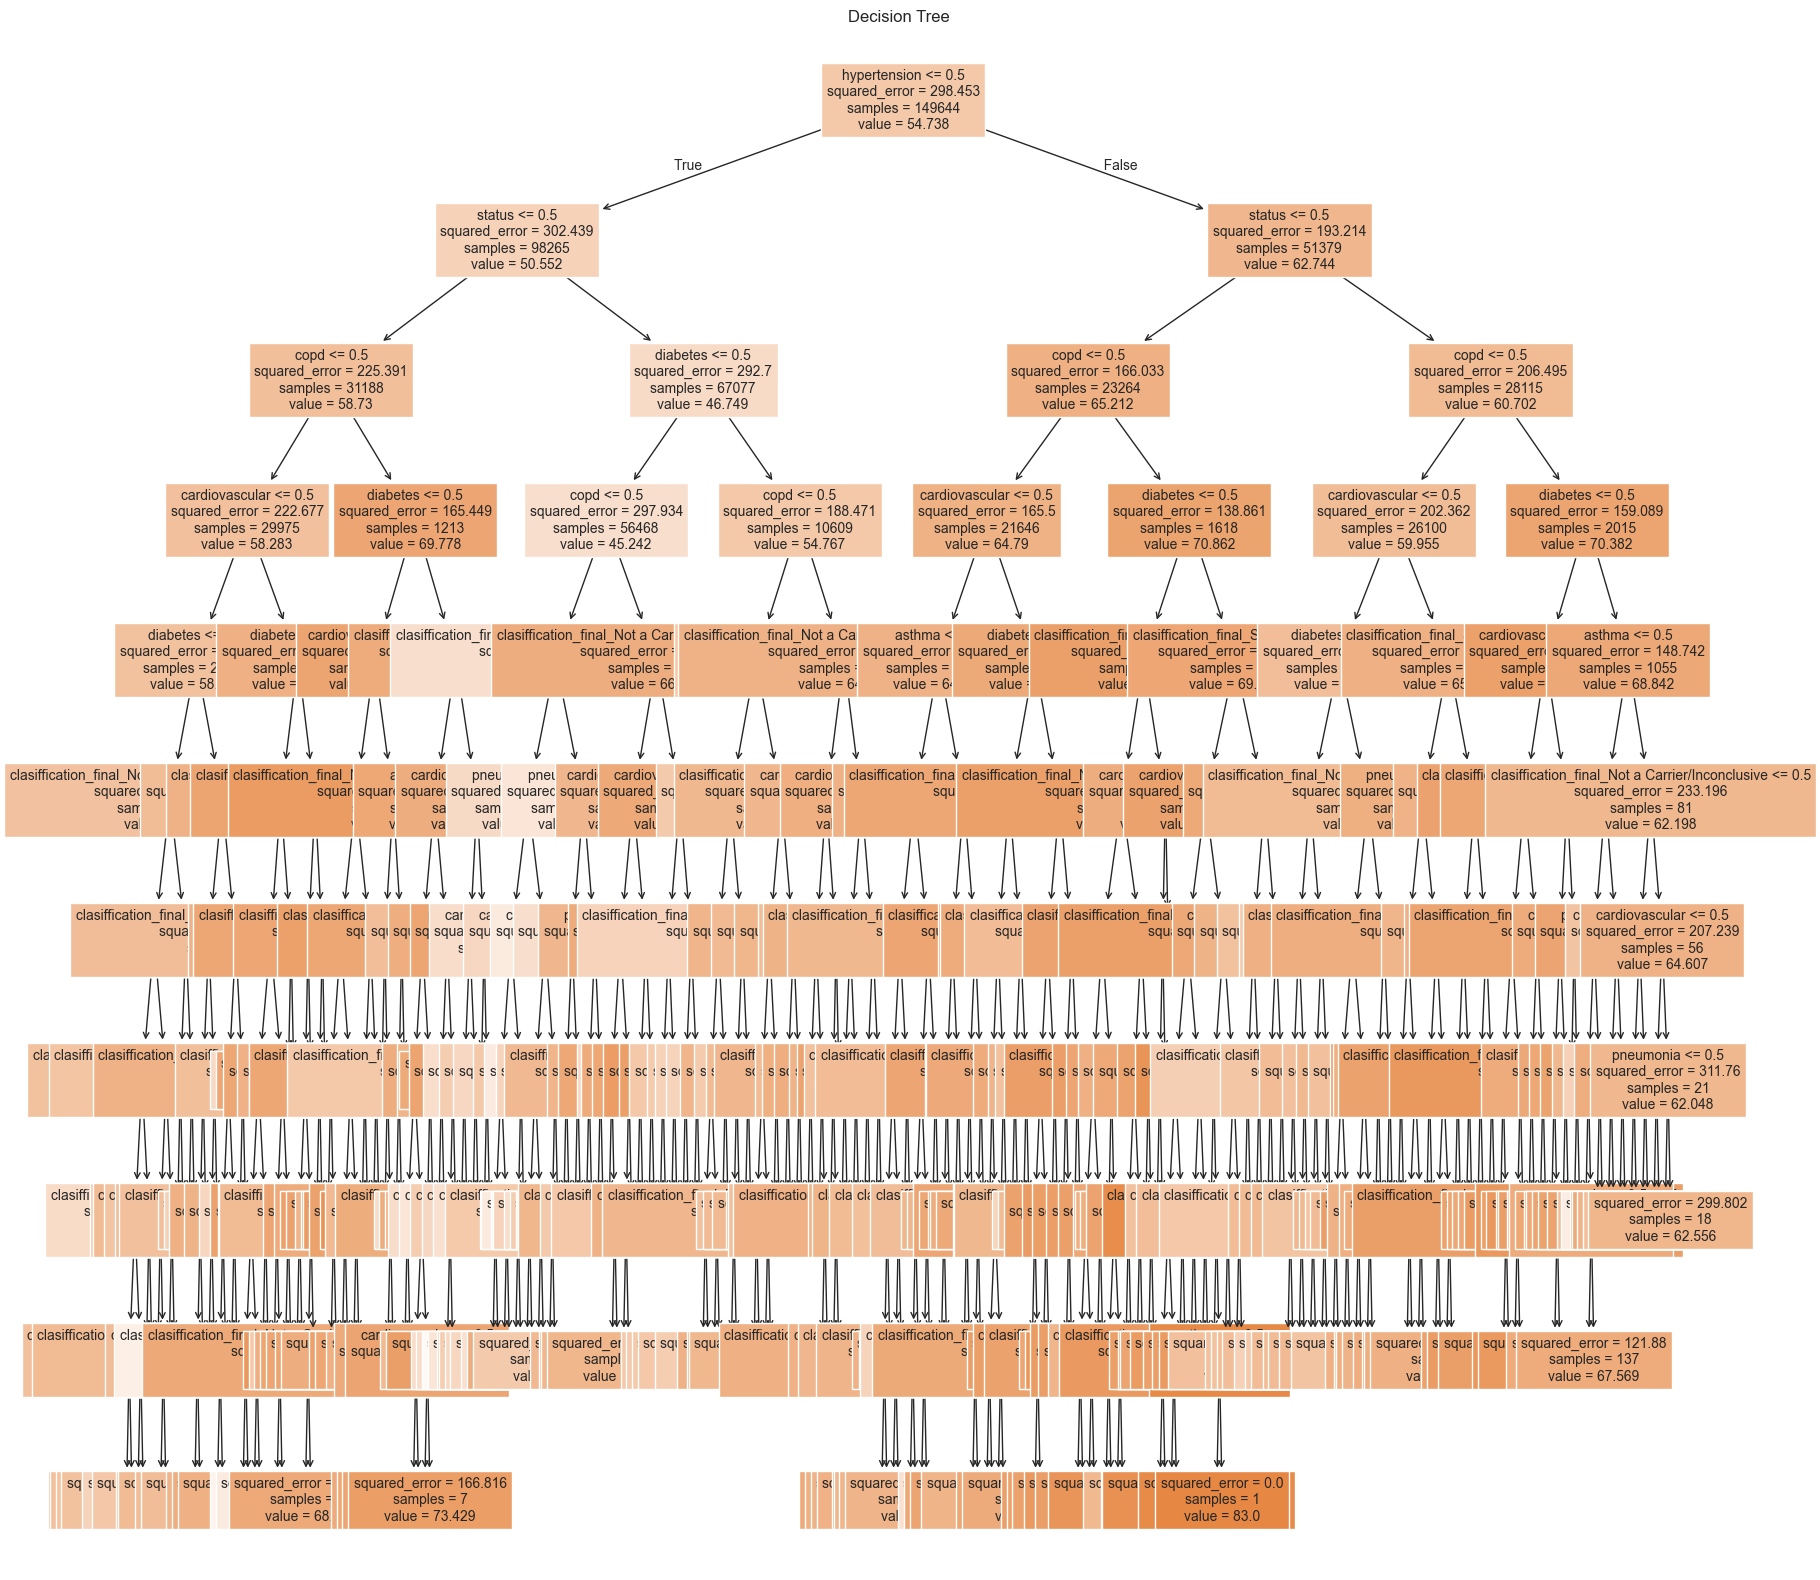

In [212]:
# Decision Tree Regressor
X = covid_data_copy.drop(columns=['age'])  
y = covid_data_copy['age']  

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_reg.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print("Decision Tree Regressor R²:", r2_dt)
print("Decision Tree Regressor MSE:", mse_dt)

plt.figure(figsize=(20, 20))  
plot_tree(dt_reg, filled=True, feature_names=X.columns, class_names=["Age"], fontsize=10)
plt.title("Decision Tree")
plt.show()

In [213]:
# Random Forest Regressor
X = covid_data_copy.drop(columns=['age'])  
y = covid_data_copy['age'] 

# Splitting into training and testing sets
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=10, random_state=42)
rf_reg.fit(X_train, y_reg_train)

# Predictions
y_pred_rf = rf_reg.predict(X_test)

r2_rf = r2_score(y_reg_test, y_pred_rf)
mse_rf = mean_squared_error(y_reg_test, y_pred_rf)

print("Random Forest Regressor R²:", r2_rf)
print("Random Forest Regressor MSE:", mse_rf)


Random Forest Regressor R²: 0.25122590516319565
Random Forest Regressor MSE: 225.62133530773085


### Classification Models

Logistic Regression Accuracy: 0.6714423179728429


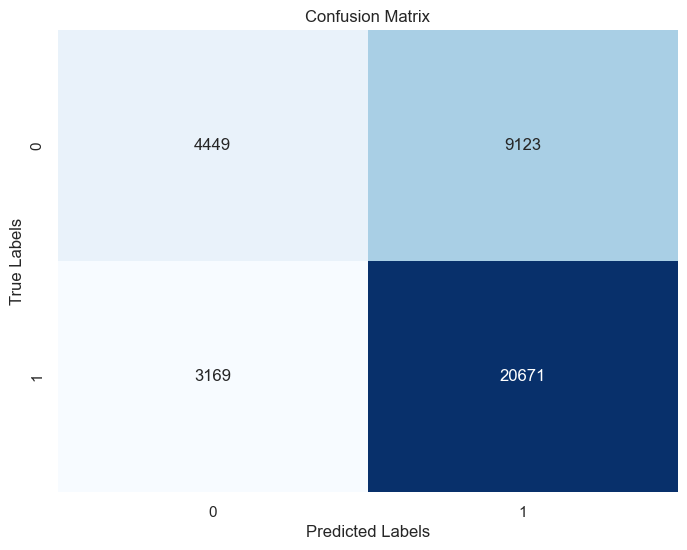

Precision: 0.69379740887427
Recall: 0.8670721476510067
F1-Score: 0.770817019055077

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.33      0.42     13572
           1       0.69      0.87      0.77     23840

    accuracy                           0.67     37412
   macro avg       0.64      0.60      0.60     37412
weighted avg       0.65      0.67      0.64     37412



In [214]:
# Logistic regression to check how various cormobidities influence the likelihood of a patient being either alive or dead (status)
X = covid_data_copy.drop(columns=['status', 'age'])  
y = covid_data_copy['status']  

# Train-test split
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Set a higher max_iter in case of convergence issues
log_reg.fit(X_train, y_class_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

acc_log = accuracy_score(y_class_test, y_pred_log)
print("Logistic Regression Accuracy:", acc_log)

# Confusion Matrix
cm = confusion_matrix(y_class_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Precision, Recall, F1-Score
precision = precision_score(y_class_test, y_pred_log)
recall = recall_score(y_class_test, y_pred_log)
f1 = f1_score(y_class_test, y_pred_log)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Classification Report 
print("\nClassification Report:")
print(classification_report(y_class_test, y_pred_log))

Decision Tree Classifier Accuracy: 0.672591681813322


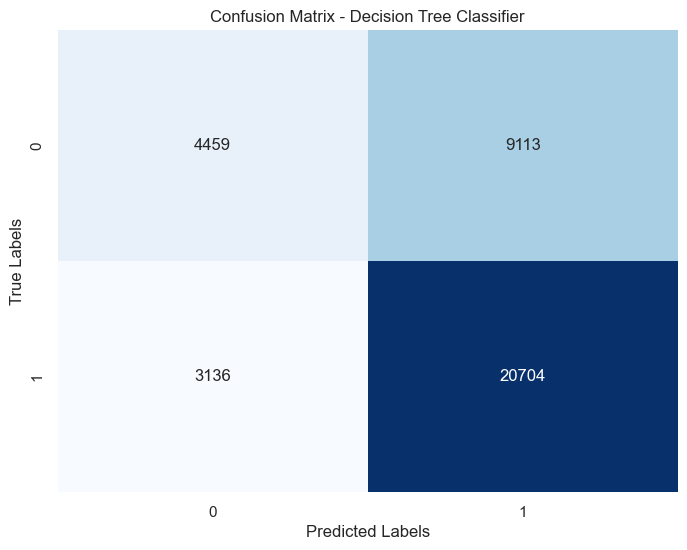

Precision: 0.6943689841365663
Recall: 0.8684563758389262
F1-Score: 0.7717166446130048

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.33      0.42     13572
           1       0.69      0.87      0.77     23840

    accuracy                           0.67     37412
   macro avg       0.64      0.60      0.60     37412
weighted avg       0.66      0.67      0.64     37412



In [215]:
# Decision Tree Classifier Accuracy
X = covid_data_copy.drop(columns=['status', 'age'])  
y = covid_data_copy['status']  

# Train-test split
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier 
dt_clf = DecisionTreeClassifier(random_state=50, max_depth=5)  
dt_clf.fit(X_train, y_class_train)

# Predictions
y_pred_dt_clf = dt_clf.predict(X_test)

acc_dt_clf = accuracy_score(y_class_test, y_pred_dt_clf)
print("Decision Tree Classifier Accuracy:", acc_dt_clf)

# Confusion Matrix
cm = confusion_matrix(y_class_test, y_pred_dt_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

# Precision, Recall, F1-Score
precision = precision_score(y_class_test, y_pred_dt_clf)
recall = recall_score(y_class_test, y_pred_dt_clf)
f1 = f1_score(y_class_test, y_pred_dt_clf)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Classification Report (optional, for more detailed metrics)
print("\nClassification Report:")
print(classification_report(y_class_test, y_pred_dt_clf))

Random Forest Classifier Accuracy: 0.6742489040949428


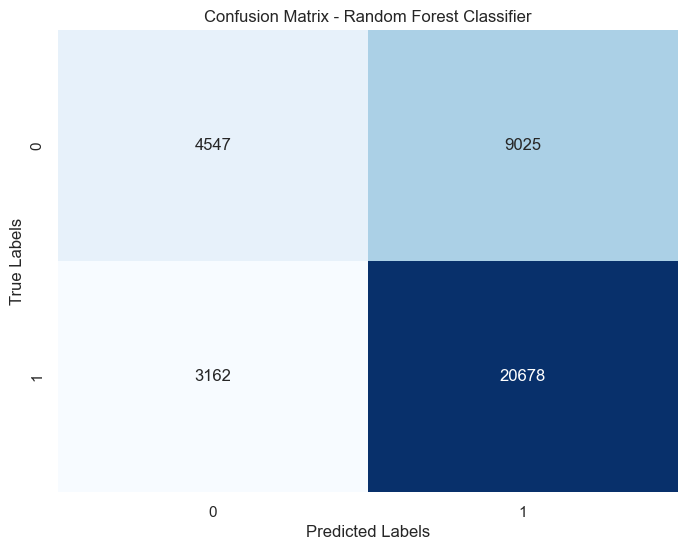

Precision: 0.6961586371746962
Recall: 0.8673657718120805
F1-Score: 0.7723885475225519

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.34      0.43     13572
           1       0.70      0.87      0.77     23840

    accuracy                           0.67     37412
   macro avg       0.64      0.60      0.60     37412
weighted avg       0.66      0.67      0.65     37412



In [216]:
# Random Forest Classifier Accuracy
X = covid_data_copy.drop(columns=['status', 'age'])  
y = covid_data_copy['status']  

# Train-test split
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier 
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_class_train)

# Predictions
y_pred_rf_clf = rf_clf.predict(X_test)

acc_rf_clf = accuracy_score(y_class_test, y_pred_rf_clf)
print("Random Forest Classifier Accuracy:", acc_rf_clf)

# Confusion Matrix
cm = confusion_matrix(y_class_test, y_pred_rf_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

# Precision, Recall, F1-Score
precision = precision_score(y_class_test, y_pred_rf_clf)
recall = recall_score(y_class_test, y_pred_rf_clf)
f1 = f1_score(y_class_test, y_pred_rf_clf)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Classification Report 
print("\nClassification Report:")
print(classification_report(y_class_test, y_pred_rf_clf))

In [ ]:
# Hyperparameter Tuning
X = covid_data_copy.drop(columns=['status', 'age'])  
y = covid_data_copy['status']  

# Train-test split
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Classifier 
rf_clf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 5, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],       # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# GridSearchCV 
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_class_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

results_df = pd.DataFrame(grid_search.cv_results_)

print("\nGrid Search Results:")
print(results_df[['params', 'mean_test_score', 'std_test_score']])

# Train and evaluate with best parameters 
best_rf_clf = grid_search.best_estimator_

# Making predictions with the best model
y_pred_rf_clf = best_rf_clf.predict(X_test)

acc_rf_clf = accuracy_score(y_class_test, y_pred_rf_clf)
print("\nRandom Forest Classifier Accuracy with Best Parameters:", acc_rf_clf)

# Confusion Matrix
cm = confusion_matrix(y_class_test, y_pred_rf_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest Classifier with Best Parameters")
plt.show()

# Precision, Recall, F1-Score
precision = precision_score(y_class_test, y_pred_rf_clf)
recall = recall_score(y_class_test, y_pred_rf_clf)
f1 = f1_score(y_class_test, y_pred_rf_clf)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
